In [62]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import statistics 

Set firstTrilogy as false if you want to see the outputs for episodes 4 through 6. By default, true shows episodes 1 through 3

In [63]:
firstTrilogy = True
if firstTrilogy:
    lower = 1
    upper = 4
else:
    lower = 4
    upper = 7
    
js_graph = []
for i in range(lower,upper):
    with open('star_wars_dataset/starwars-episode-%i-interactions-allCharacters.json' %i) as f:
    #with open('star_wars_dataset/starwars-full-interactions-allCharacters.json') as f:
            js_graph1 = json.load(f)
    js_graph.append(nx.json_graph.node_link_graph(js_graph1))

for i in range(0,3):
    cy = nx.json_graph.cytoscape_data(js_graph[i])
    idToName = {}
    for c in cy["elements"]["nodes"]:
        idToName[int(c['data']['id'])]= c['data']['name']
    js_graph[i] = nx.relabel_nodes(js_graph[i],idToName)



In [64]:
all_interactions = nx.compose_all(js_graph)

edge_values_all=nx.get_edge_attributes(all_interactions,'value')
ep1 = nx.get_edge_attributes(js_graph[0],'value')
ep2 = nx.get_edge_attributes(js_graph[1],'value')
ep3 = nx.get_edge_attributes(js_graph[2],'value')

#print(edge_values_all)
for e in edge_values_all:
    edge_values_all[e] = 0
    if e in ep1.keys():
        edge_values_all[e] = edge_values_all[e] + ep1[e]
    if e in ep2.keys():
        edge_values_all[e] = edge_values_all[e] + ep2[e]
    if e in ep3.keys():
        edge_values_all[e] = edge_values_all[e] + ep3[e]
    edge_values_all[e] = {'value': edge_values_all[e]}

#print(edge_values_all)
nx.set_edge_attributes(all_interactions,edge_values_all)        
     

In [65]:
#Displaying the people involved in over 25 interactions
closeconnections = []
for i in list(all_interactions.edges.data('value')):
    if i[2]>25:
        closeconnections.append(i[1])
        print(i[0] +" and "+i[1])

R2-D2 and ANAKIN
QUI-GON and OBI-WAN


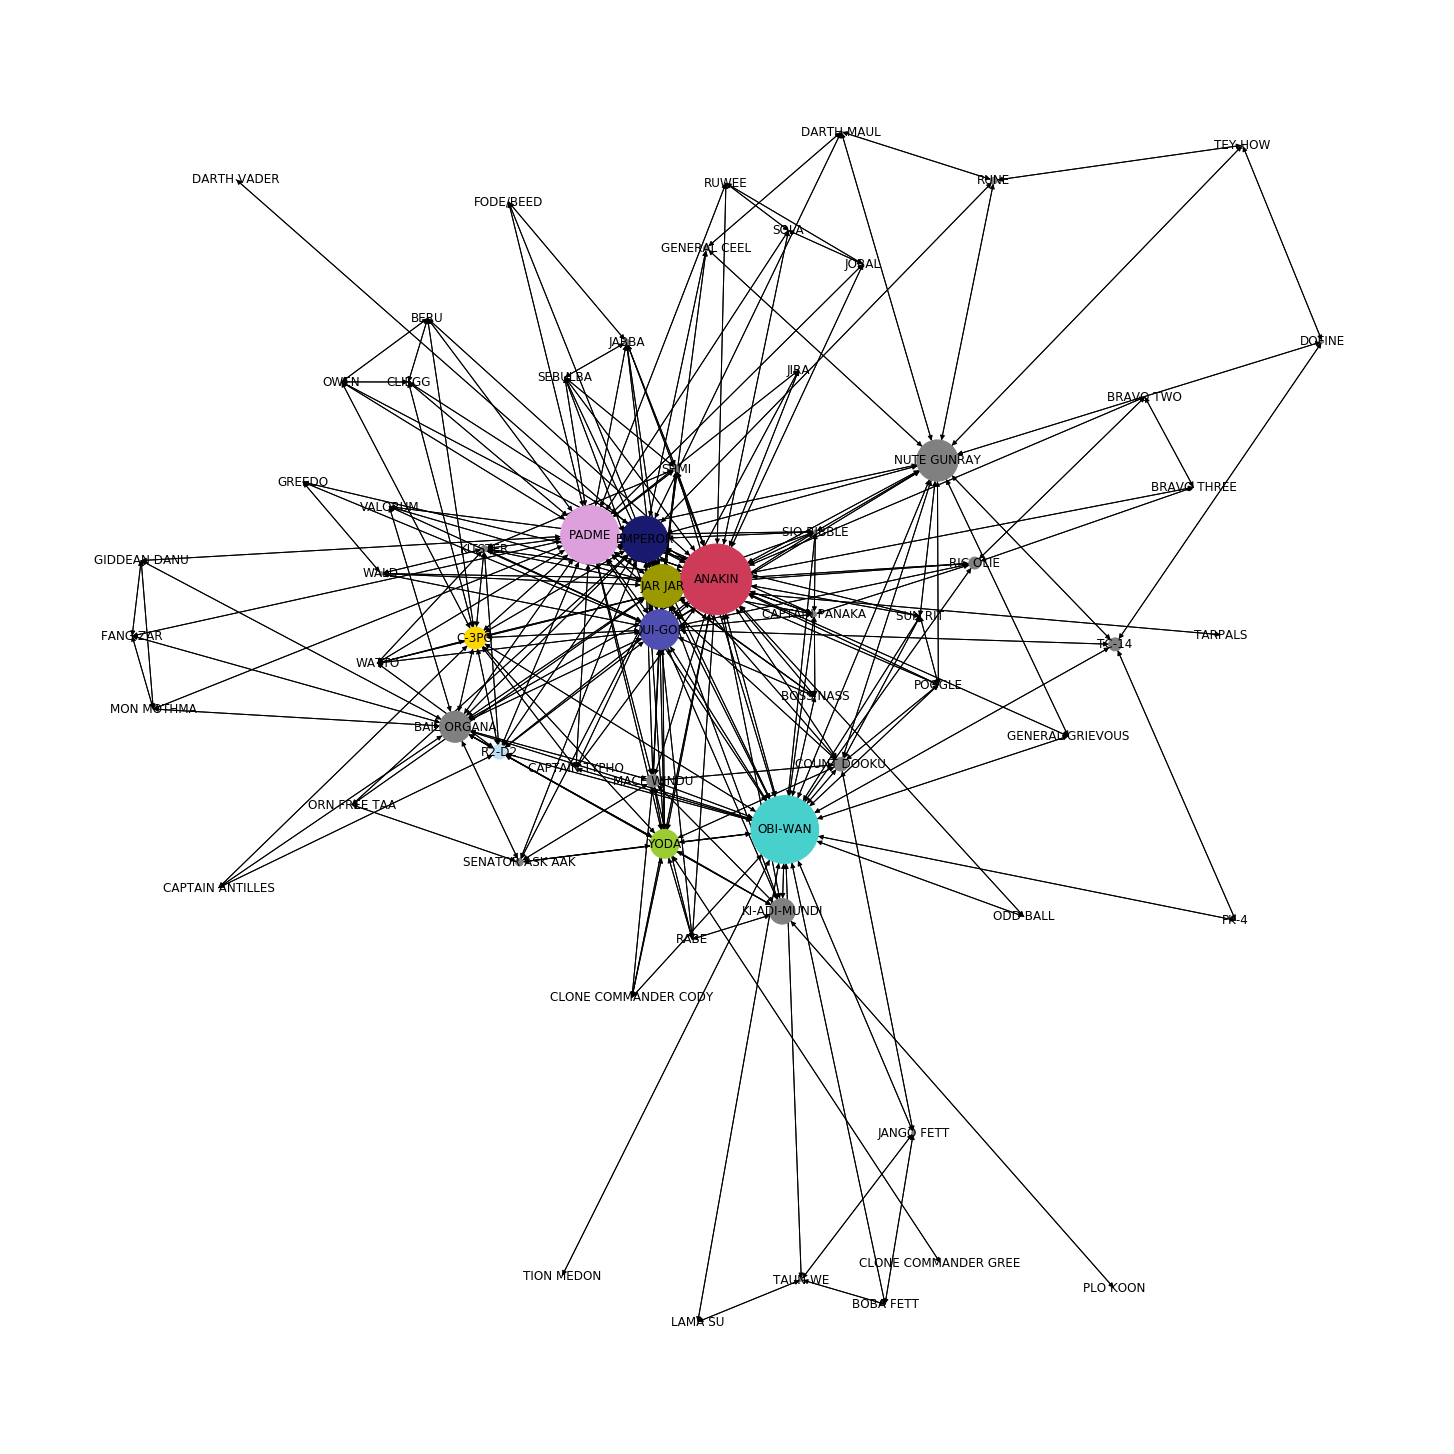

In [66]:
#plotting the largest component for neater rendering purposes
largest_cc = nx.DiGraph(all_interactions.subgraph(max(nx.connected_components(all_interactions), key = len)).copy())
labels = nx.get_node_attributes(largest_cc, 'name') 
colors = nx.get_node_attributes(largest_cc, 'colour')
edge_values = nx.get_edge_attributes(largest_cc,'value')
betweenness = nx.betweenness_centrality(largest_cc)
#nx.draw(all)
bet_val= [20000 * b for b in betweenness.values()]
plt.figure(figsize=(20,20))
nx.draw(largest_cc,labels=labels,node_color = list(colors.values()), node_size = bet_val)
plt.savefig("Episodes_%i_to_%i.png" %(x,y-1))

In [67]:
print("Number of Characters: %i" %(len(list(all_interactions.nodes()))) )
print("Number of edges: %i" %(len(list(all_interactions.edges()))) )

print ("Total no of interactions: %i" %(sum([i[2] for i in all_interactions.edges.data('value')])) )

Number of Characters: 65
Number of edges: 251
Total no of interactions: 728
